<h1 align="center"> 
  Air Quality
</h1>

<h4 align="center">
    <img alt="AirQuality" title="#AirQuality" src="https://www.healthissuesindia.com/wp-content/uploads/2020/02/81287396_l-2048x1365.jpg" width="400px;" />
</h4>

## 🔍 About

The following program intends to predict air quality based on the amount of carbon monoxide. This problem purpose by professor Diego Furtado in the discipline of Machine Learning aims to solve a known problem using linear regression methods. In sequence, we'll analyze some approaches to tackle this problem by predicting the quantity of carbon dioxide in the air.

In this [link](https://archive.ics.uci.edu/ml/datasets/Air+Quality), you can locate the dataset that was used. We also made a jupyter notebook available for a better comprehension of the topic.

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading and parsing data

In [2]:
# Reading .csv
air_quality = pd.read_csv(os.path.join('data', 'AirQualityUCI.csv'), delimiter=';')

# Dropping Date and Hours
air_quality.drop(['Date', 'Time'], axis=1, inplace=True)
print(air_quality.head(8))

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   
5     1.2       1197.0      38.0       4.7          750.0     89.0   
6     1.2       1185.0      31.0       3.6          690.0     62.0   
7     1.0       1136.0      31.0       3.3          672.0     62.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.78

### Correlation between all of the features

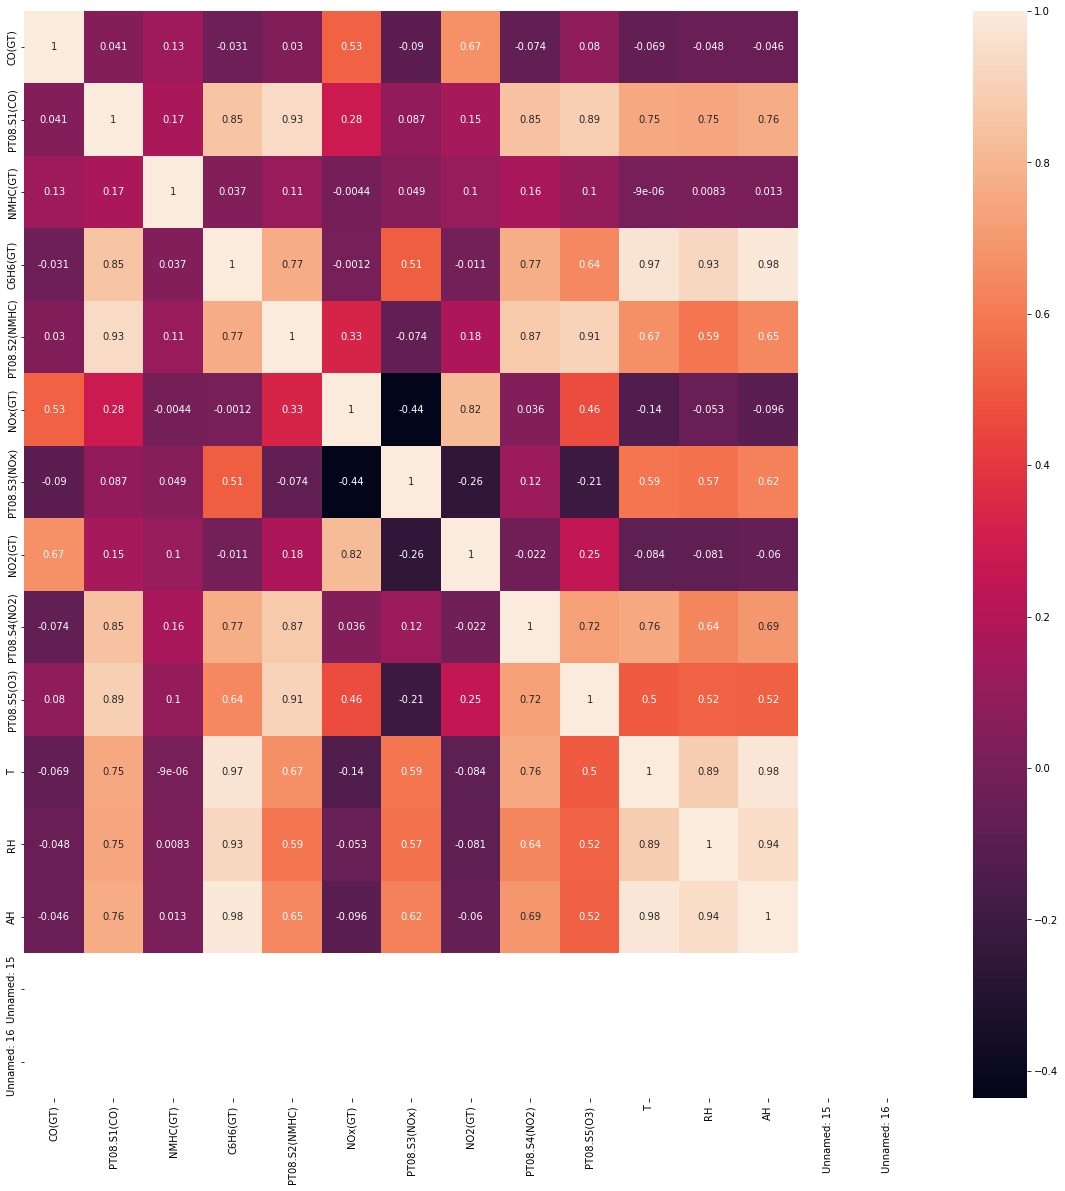

In [3]:
# Checking correlation between all features
plt.figure(figsize=(20,20))
sns.heatmap(air_quality.corr(), annot=True);
# plt.show()

### Selecting feature to be predicted and those that will be used in model

In [4]:
# Parsing the attributes based on highest correlation (O3, NO2, NHMC)
x_air_quality_attributes = air_quality.drop(['CO(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], axis=1)
# x_air_quality_attributes = x_air_quality_attributes.apply(pd.to_numeric, errors='coerce')
x_air_quality_attributes.fillna(0, inplace=True)
print(x_air_quality_attributes)
y_air_quality_attributes = air_quality.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], axis=1)
y_air_quality_attributes.fillna(0, inplace=True)

      PT08.S1(CO)  NMHC(GT)  C6H6(GT)  NOx(GT)  PT08.S3(NOx)  NO2(GT)     T  \
0          1360.0     150.0      11.9    166.0        1056.0    113.0  13.6   
1          1292.0     112.0       9.4    103.0        1174.0     92.0  13.3   
2          1402.0      88.0       9.0    131.0        1140.0    114.0  11.9   
3          1376.0      80.0       9.2    172.0        1092.0    122.0  11.0   
4          1272.0      51.0       6.5    131.0        1205.0    116.0  11.2   
...           ...       ...       ...      ...           ...      ...   ...   
9466          0.0       0.0       0.0      0.0           0.0      0.0   0.0   
9467          0.0       0.0       0.0      0.0           0.0      0.0   0.0   
9468          0.0       0.0       0.0      0.0           0.0      0.0   0.0   
9469          0.0       0.0       0.0      0.0           0.0      0.0   0.0   
9470          0.0       0.0       0.0      0.0           0.0      0.0   0.0   

        RH      AH  Unnamed: 15  Unnamed: 16  
0   

### Building our model

In [5]:
# Spliting test data
x_air_quality_training, x_air_quality_test, y_air_quality_training, y_air_quality_test = train_test_split(x_air_quality_attributes, y_air_quality_attributes, test_size = 0.3, random_state = 0)

# Instantiating the regressor
regression = LinearRegression()
regression.fit(x_air_quality_training, y_air_quality_training)

# Showing results
prediction = regression.predict(x_air_quality_test)
print(x_air_quality_test)
print(y_air_quality_test)
print(prediction)

      PT08.S1(CO)  NMHC(GT)  C6H6(GT)  NOx(GT)  PT08.S3(NOx)  NO2(GT)      T  \
6088       1354.0    -200.0      16.7    588.0         529.0    193.0   16.1   
9020       1224.0    -200.0      10.0    251.0         571.0    131.0   23.3   
4254       1197.0    -200.0      11.4   -200.0         601.0   -200.0   26.0   
7095        897.0    -200.0       3.1   -200.0         953.0   -200.0    8.9   
296         941.0      47.0       2.5     51.0        1298.0     70.0   13.0   
...           ...       ...       ...      ...           ...      ...    ...   
5221       1079.0    -200.0      10.2   -200.0         758.0   -200.0   15.3   
7165       -200.0    -200.0    -200.0    366.0        -200.0    121.0 -200.0   
5858       1237.0    -200.0      16.5   -200.0         615.0   -200.0    8.8   
1331        927.0    -200.0       3.5     56.0        1109.0     54.0   14.6   
7630        973.0    -200.0       5.9    202.0         851.0    126.0   15.4   

         RH        AH  Unnamed: 15  Unn